In [1]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [31]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages('mlbench')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
library(caret)
library(ggplot2)
library(mlbench)
library(tidyverse)
library(dplyr)
library(stats)


In [9]:
### Chapter 1
x <- 12

In [10]:
# create vector of integers from 0 to 9
some_numbers <- c(0,1,2,3,4,5,6,7,8,9)
# alternatively 
some_numbers <- c(0:9)
some_numbers

[1] 0 1 2 3 4 5 6 7 8 9

In [11]:
# R functions
mean(some_numbers)

[1] 4.5

In [13]:
### Chapter 2
## loading data
paygap <- read.csv('/content/UK-data/UK Gender Pay Gap Data - 2022 to 2023.csv', header = TRUE)


In [14]:
head(paygap, n = 5)

,EmployerName,EmployerId,Address,PostCode,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,⋯,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1509 GROUP,15320,"Royal Grammar School, High Street, Guildford, Surrey, GU1 3BB",GU1 3BB,04104101,"85200, 85310",16.13,19.99,NA,NA,⋯,43.75,65.62,34.38,https://rgsg.co.uk,Catherine Perceval (Bursar),250 to 499,1509 GROUP,False,2023/04/05 00:00:00,2022/11/08 14:07:47
2,A P P WHOLESALE LIMITED,21477,"Unit 1 Radford Industrial Estate, Goodhall Street, London, England, NW10 6UA",NW10 6UA,06552800,46740,11.60,-17.60,37.1,0.0,⋯,13.10,78.50,21.50,https://www.lordsgrouptradingplc.co.uk/docs/lordsgrouptradinglimitedlibraries/archive/gender-pay-gap/gender-pay-report-2022.pdf,Chris Day (CFO),250 to 499,A P P WHOLESALE LIMITED,False,2023/04/05 00:00:00,2022/12/12 14:59:46
3,A.J.N. STEELSTOCK LTD.,14835,"Icknield Way, Kentford, Newmarket, Suffolk, CB8 7QT",CB8 7QT,00689647,46720,16.20,3.30,-20.0,0.0,⋯,10.80,87.10,12.90,https://www.ajnsteelstock.co.uk/wp-content/uploads/2022/10/2022-Gender-Pay-Gap-Report.pdf,Courtney Bell (FD),250 to 499,A.J.N. STEELSTOCK LTD.,False,2023/04/05 00:00:00,2022/10/11 15:34:17
4,AB AGRI LIMITED,762,"Weston Centre, 10 Grosvenor Street, London, W1K 4QY",W1K 4QY,00193800,10910,-1.20,-7.40,-7.3,-163.1,⋯,29.20,63.80,36.20,,Craig Peck (Head of Reward & Global Mobility),1000 to 4999,AB AGRI LIMITED,False,2023/04/05 00:00:00,2022/12/12 11:07:20
5,AB WORLD FOODS LIMITED,764,"Weston Centre, 10 Grosvenor Street, London, W1K 4QY",W1K 4QY,01400901,10890,-8.60,-12.30,10.3,-20.8,⋯,33.70,44.60,55.40,https://abworldfoods.com/documents/ABWF_Gender_Pay_Gap_Narrative_2022.pdf,Andy Mayhew (Managing Director),250 to 499,AB WORLD FOODS LIMITED,False,2023/04/05 00:00:00,2022/09/30 09:45:25


In [15]:
colnames(paygap)

[1] "EmployerName"              "EmployerId"               
 [3] "Address"                   "PostCode"                 
 [5] "CompanyNumber"             "SicCodes"                 
 [7] "DiffMeanHourlyPercent"     "DiffMedianHourlyPercent"  
 [9] "DiffMeanBonusPercent"      "DiffMedianBonusPercent"   
[11] "MaleBonusPercent"          "FemaleBonusPercent"       
[13] "MaleLowerQuartile"         "FemaleLowerQuartile"      
[15] "MaleLowerMiddleQuartile"   "FemaleLowerMiddleQuartile"
[17] "MaleUpperMiddleQuartile"   "FemaleUpperMiddleQuartile"
[19] "MaleTopQuartile"           "FemaleTopQuartile"        
[21] "CompanyLinkToGPGInfo"      "ResponsiblePerson"        
[23] "EmployerSize"              "CurrentName"              
[25] "SubmittedAfterTheDeadline" "DueDate"                  
[27] "DateSubmitted"

In [16]:
dim(paygap)

[1] 668  27

In [17]:
class(paygap)

[1] "data.frame"

In [18]:
class(paygap$DiffMeanHourlyPercent)

[1] "numeric"

# Chapter 3

In [19]:
bodytemp <- c(97.1,97.1,97.1,97.2,97.3,97.4,97.4,97.4,97.4,97.5,97.5,97.6,97.6,97.6)
gender <- c(1,1,1,1,1,1,1,1,1,1,1,1,1,1)
heartrate <- c(73,75,82,64,69,70,68,72,78,70,75,74,69,69)

In [21]:
cardiacdata <- data.frame(bodytemp = bodytemp, gender = gender, heartrate = heartrate)

In [22]:
cardiacdata[1,3]

[1] 73

In [23]:
cardiacdata[5:7,1:3]

,bodytemp,gender,heartrate
,<dbl>,<dbl>,<dbl>
5,97.3,1,69
6,97.4,1,70
7,97.4,1,68


In [24]:
temperatures <- cardiacdata$bodytemp 

In [25]:
colnames(cardiacdata)

[1] "bodytemp"  "gender"    "heartrate"

In [26]:
dim(cardiacdata)

[1] 14  3

In [27]:
class(cardiacdata)

[1] "data.frame"

In [28]:
class(cardiacdata$bodytemp)

[1] "numeric"

In [29]:
class(cardiacdata$heartrate)

[1] "numeric"

In [30]:
temperatures <- cardiacdata$bodytemp

In [33]:
heartrates <- select(cardiacdata, gender, heartrate)

In [34]:
cardiacdata <- rename(cardiacdata, bodytemp_degF = bodytemp)

In [35]:
cardiacdata <- rename(cardiacdata, heartrate_bpm = heartrate)

In [36]:
head(cardiacdata)

,bodytemp_degF,gender,heartrate_bpm
,<dbl>,<dbl>,<dbl>
1,97.1,1,73
2,97.1,1,75
3,97.1,1,82
4,97.2,1,64
5,97.3,1,69
6,97.4,1,70


In [38]:
cardiacdata <- mutate(cardiacdata, bodytemp_degC = (bodytemp_degF - 32)*(5/9))

In [39]:
cardiacdata <- mutate(cardiacdata, gender = ifelse(gender == 1, 'Female', 
                                                   ifelse(gender == 2, 'Male', NA)))

In [40]:
head(cardiacdata)

,bodytemp_degF,gender,heartrate_bpm,bodytemp_degC
,<dbl>,<chr>,<dbl>,<dbl>
1,97.1,Female,73,36.16667
2,97.1,Female,75,36.16667
3,97.1,Female,82,36.16667
4,97.2,Female,64,36.22222
5,97.3,Female,69,36.27778
6,97.4,Female,70,36.33333


In [41]:
cardiacdata_female <- filter(cardiacdata, gender == 'Female')

In [42]:
cardiacdata <- cardiacdata %>%
  filter(gender == 'Female') %>%
  select(-gender) %>%
  mutate(bodytemp_Kelvin = bodytemp_degC + 273)

In [43]:
bodytemp <- c(97.1,97.1,97.1,97.2,97.3,97.4,97.4,97.4,97.4,97.5,97.5,97.6,97.6,97.6)
gender <- c(1,1,1,1,1,1,1,1,1,1,1,1,1,1)
heartrate <- c(73,75,82,64,69,70,68,72,78,70,75,74,69,69)

In [44]:
cardiacdata <- data.frame(bodytemp = bodytemp, gender = gender, heartrate = heartrate)

In [45]:
# extract column 'bodytemp' and assign to new object 'temperatures'
temperatures <- cardiacdata$bodytemp

In [46]:
# select columns 'gender' and 'heartrate' and assign to new object 'heartrates'
heartrates <- select(cardiacdata, gender, heartrate)

In [47]:
cardiacdata <- rename(cardiacdata, bodytemp_degF = bodytemp)

In [48]:
cardiacdata <- rename(cardiacdata, heartrate_bpm = heartrate)
cardiacdata <- mutate(cardiacdata, bodytemp_degC = (bodytemp_degF - 32)*(5/9))
cardiacdata <- mutate(cardiacdata, gender = ifelse(gender == 1, 'Female', 
                                                   ifelse(gender == 2, 'Male', NA)))

In [49]:
cardiacdata_byGender <- cardiacdata %>%
  group_by(gender) %>%                                
  summarize(avg_bodytemp_degF = mean(bodytemp_degF),    
            avg_bodytemp_degC = mean(bodytemp_degC), 
            avg_heartrate_bpm = mean(heartrate_bpm))

In [50]:
some_numbers <- c(4,5,6,7,NA,8)
mean(some_numbers)

[1] NA

In [51]:
mean(some_numbers, na.rm = TRUE)

[1] 6

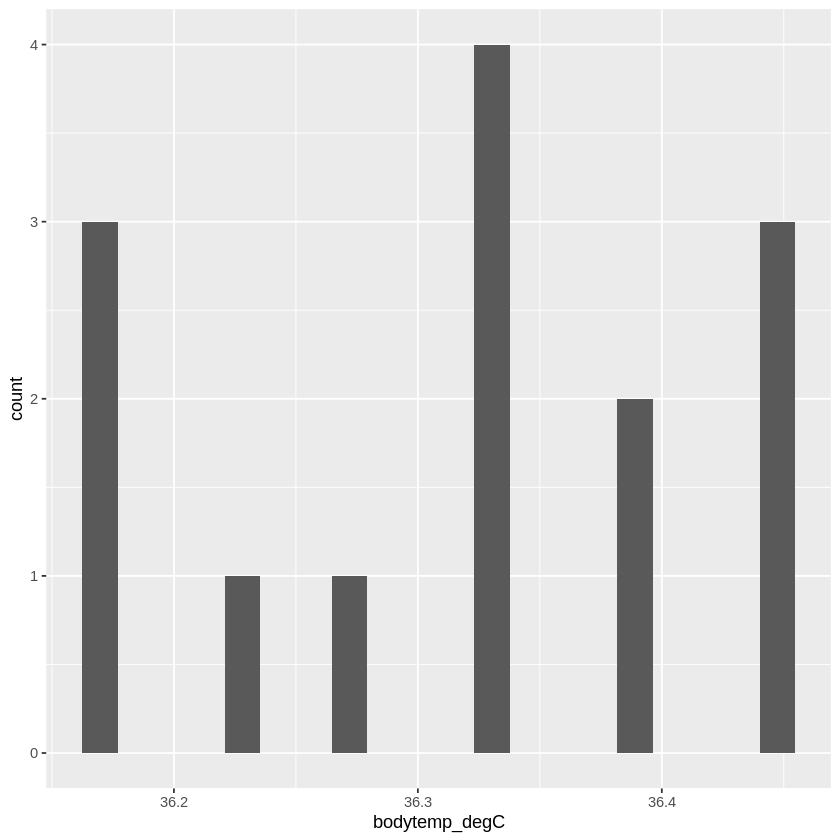

In [52]:
ggplot(data = cardiacdata, mapping = aes(x = bodytemp_degC)) + 
  geom_histogram(bins = 20)

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


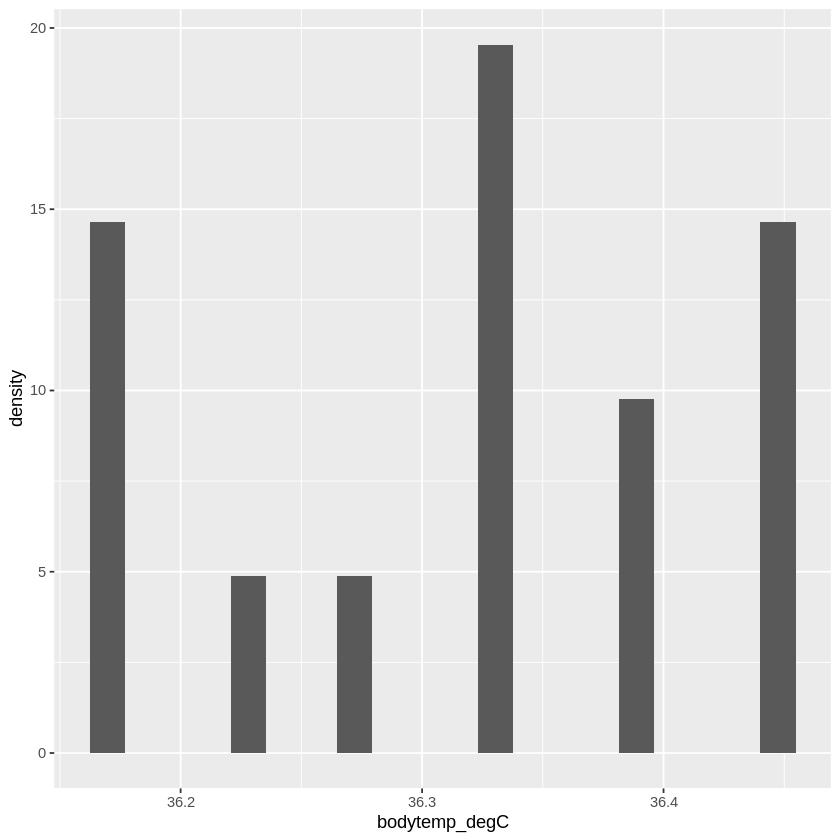

In [53]:
ggplot(data = cardiacdata, mapping = aes(x = bodytemp_degC)) + 
  geom_histogram(bins = 20, aes(y = ..density..))

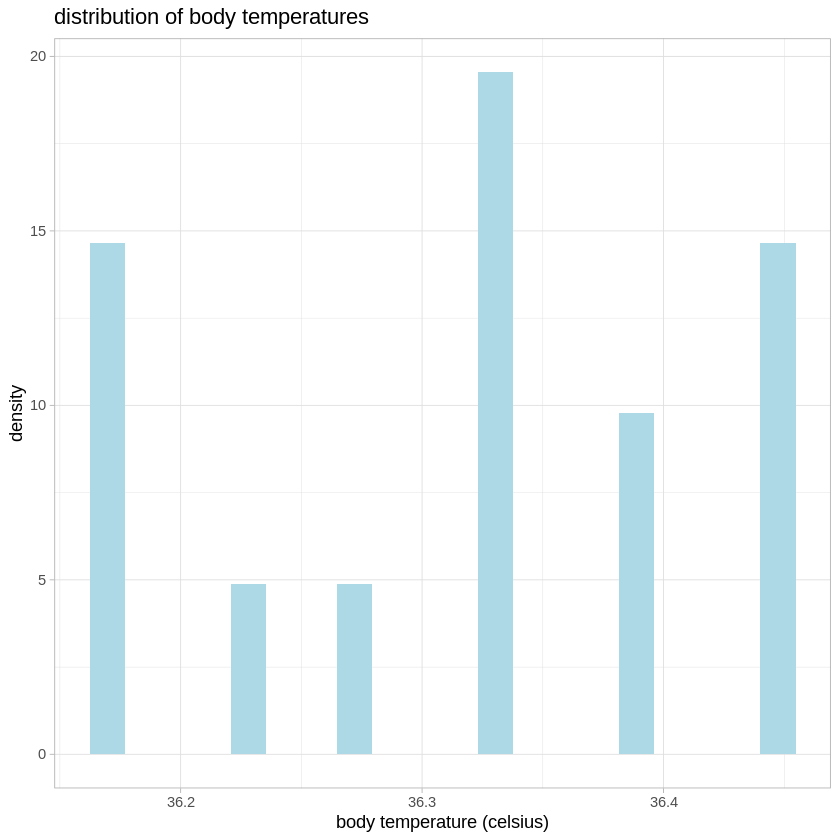

In [54]:
ggplot(data = cardiacdata, mapping = aes(x = bodytemp_degC)) + 
  geom_histogram(bins = 20, aes(y = ..density..), fill = 'lightblue') +
  xlab('body temperature (celsius)') +
  ggtitle('distribution of body temperatures') +
  theme_light()

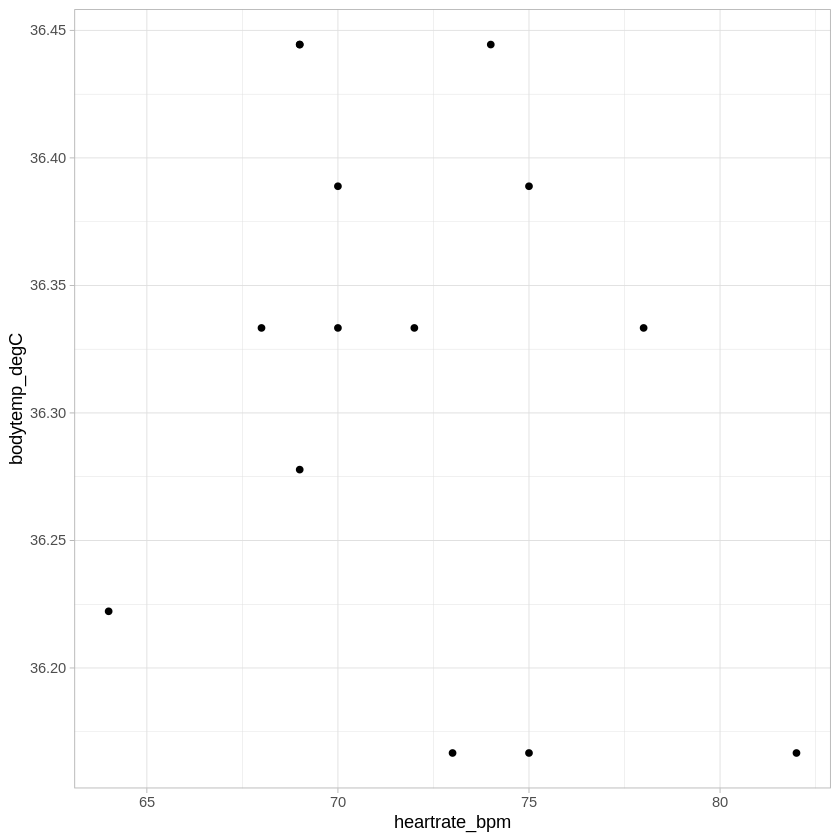

In [55]:
ggplot(data = cardiacdata, mapping = aes(x = heartrate_bpm, y = bodytemp_degC)) + 
  geom_point() +
  theme_light()

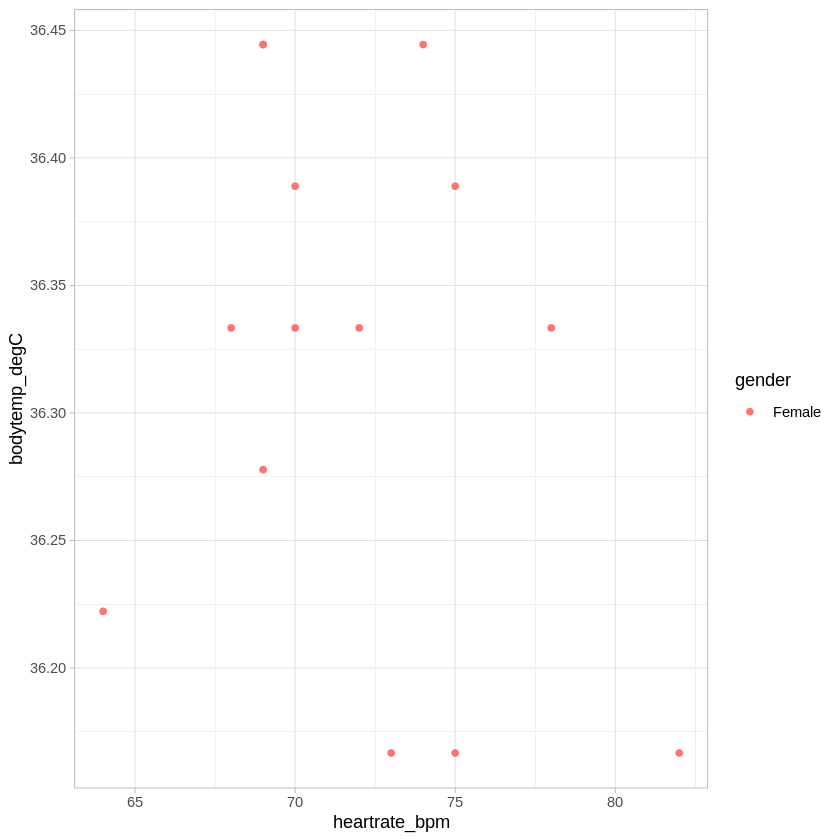

In [56]:
ggplot(data = cardiacdata, mapping = aes(x = heartrate_bpm, y = bodytemp_degC, color = gender)) + 
  geom_point() +
  theme_light()

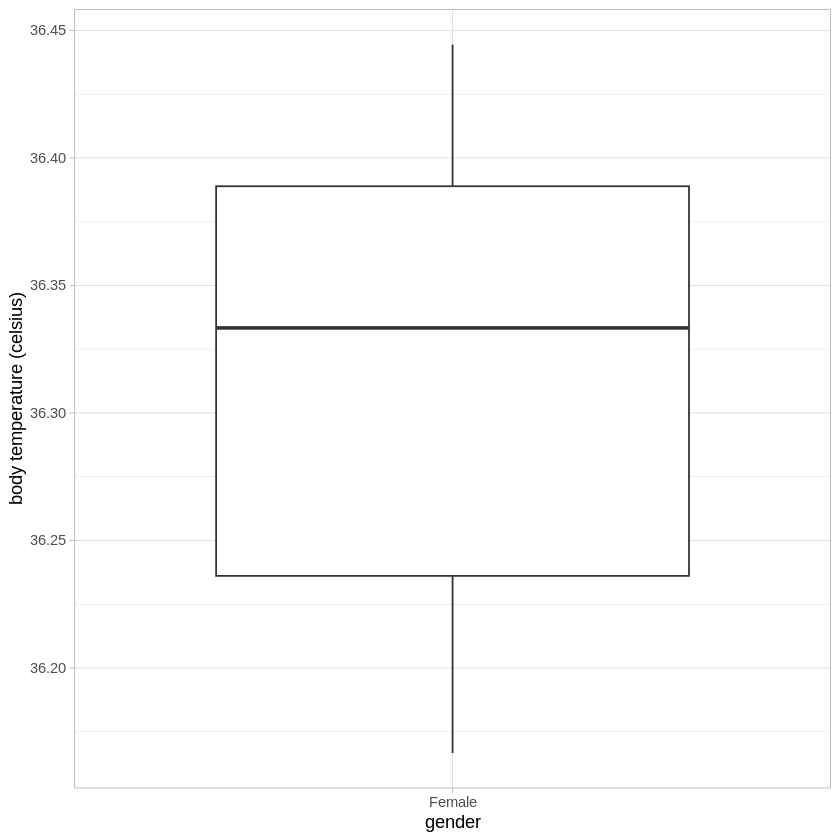

In [57]:
ggplot(data = cardiacdata, mapping = aes(x = gender, y = bodytemp_degC)) +
  geom_boxplot() +
  xlab('gender') +
  ylab('body temperature (celsius)') +
  theme_light()